In [1]:
import sys
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import datetime
from tqdm import tqdm
import GPy
from collections import defaultdict
from pathlib import Path
import seaborn as sns
import scipy.stats as stats
from matplotlib.colors import ListedColormap
import warnings
import time

mpl.rcParams['legend.frameon'] = False
mpl.rcParams['figure.autolayout'] = True
# mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


def utkarshGrid():
    plt.minorticks_on()
    plt.grid(color='grey',
             which='minor',
             linestyle=":",
             linewidth='0.1',
             )
    plt.grid(color='black',
             which='major',
             linestyle=":",
             linewidth='0.1',
             )

In [2]:
import random
random.seed(3)

%run Classes.ipynb

[STATUS] Reference Saved
[STATUS] Skipping Tests


In [3]:
data = LightCurve("reference.csv")
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data.select_curve(phiRange = phi_range, mejdynRange = mejdyn_range, mejwindRange = mejwind_range)
data.selected
zBand = 900.0
data.extract_curve()
data.curve.head(2) # iobs goes from 0 --> 10 (11 rows)
# data.simple_plot(zBand)
# data.plot_viewingangle_simple()

wavelength                                             10.0    \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             30.0    \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             50.0    \
iobs                                                            
0           [4.1465e-07, 1.3883e-06, 1.7753e-07, 2.6052e-0...   
1           [1.5032e-07, 1.4652e-06, 1.9802e-07, 2.5081e-0...   

wavelength                                             70.0    \
iobs                                                            
0           [9.1683e-06, 4.4819e-05, 9.8855e-06, 1.1481e-0...   
1           [8.0978e-06, 4.489e-05, 1.0097e-05, 0.00090249...   

wavelength                                             90.0    \
iobs                                                            
0           [8.3714e-05, 0.00025517, 8.129e-05, 2.384e-05,...   
1           [8.3075e-05, 0.00025799, 8.0892e-05, 2.4247e-0...   

wavelength                                             110.0   \
iobs                                                            
0           [0.00028939, 0.00085966, 0.00025527, 0.0001117...   
1           [0.00029871, 0.00092469, 0.0002547, 0.0001111,...   

wavelength                                             130.0   \
iobs                                                            
0           [0.00060159, 0.0015886, 0.0007023, 0.0002723, ...   
1           [0.00058962, 0.0018025, 0.00070055, 0.00027331...   

wavelength                                             150.0   \
iobs                                                            
0           [0.00079509, 0.0030784, 0.00080502, 0.00050972...   
1           [0.00078938, 0.0032975, 0.00080607, 0.00048103...   

wavelength                                             170.0   \
iobs                                                            
0           [0.0008913, 0.00566, 0.0013939, 0.00056179, 0....   
1           [0.00088974, 0.0060483, 0.0013921, 0.00056177,...   

wavelength                                             190.0   ...  \
iobs                                                           ...   
0           [0.0008789, 0.0050446, 0.0013068, 0.00060908, ...  ...   
1           [0.00087734, 0.0050459, 0.0011036, 0.00063516,...  ...   

wavelength                                             9810.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9830.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00026573...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9850.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9870.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.768...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9890.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9910.0  \


[STATUS] Plotting for nph: [], mejdyn: [0.01], mejwind: [0.11], phi: [30], viewing_angle: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


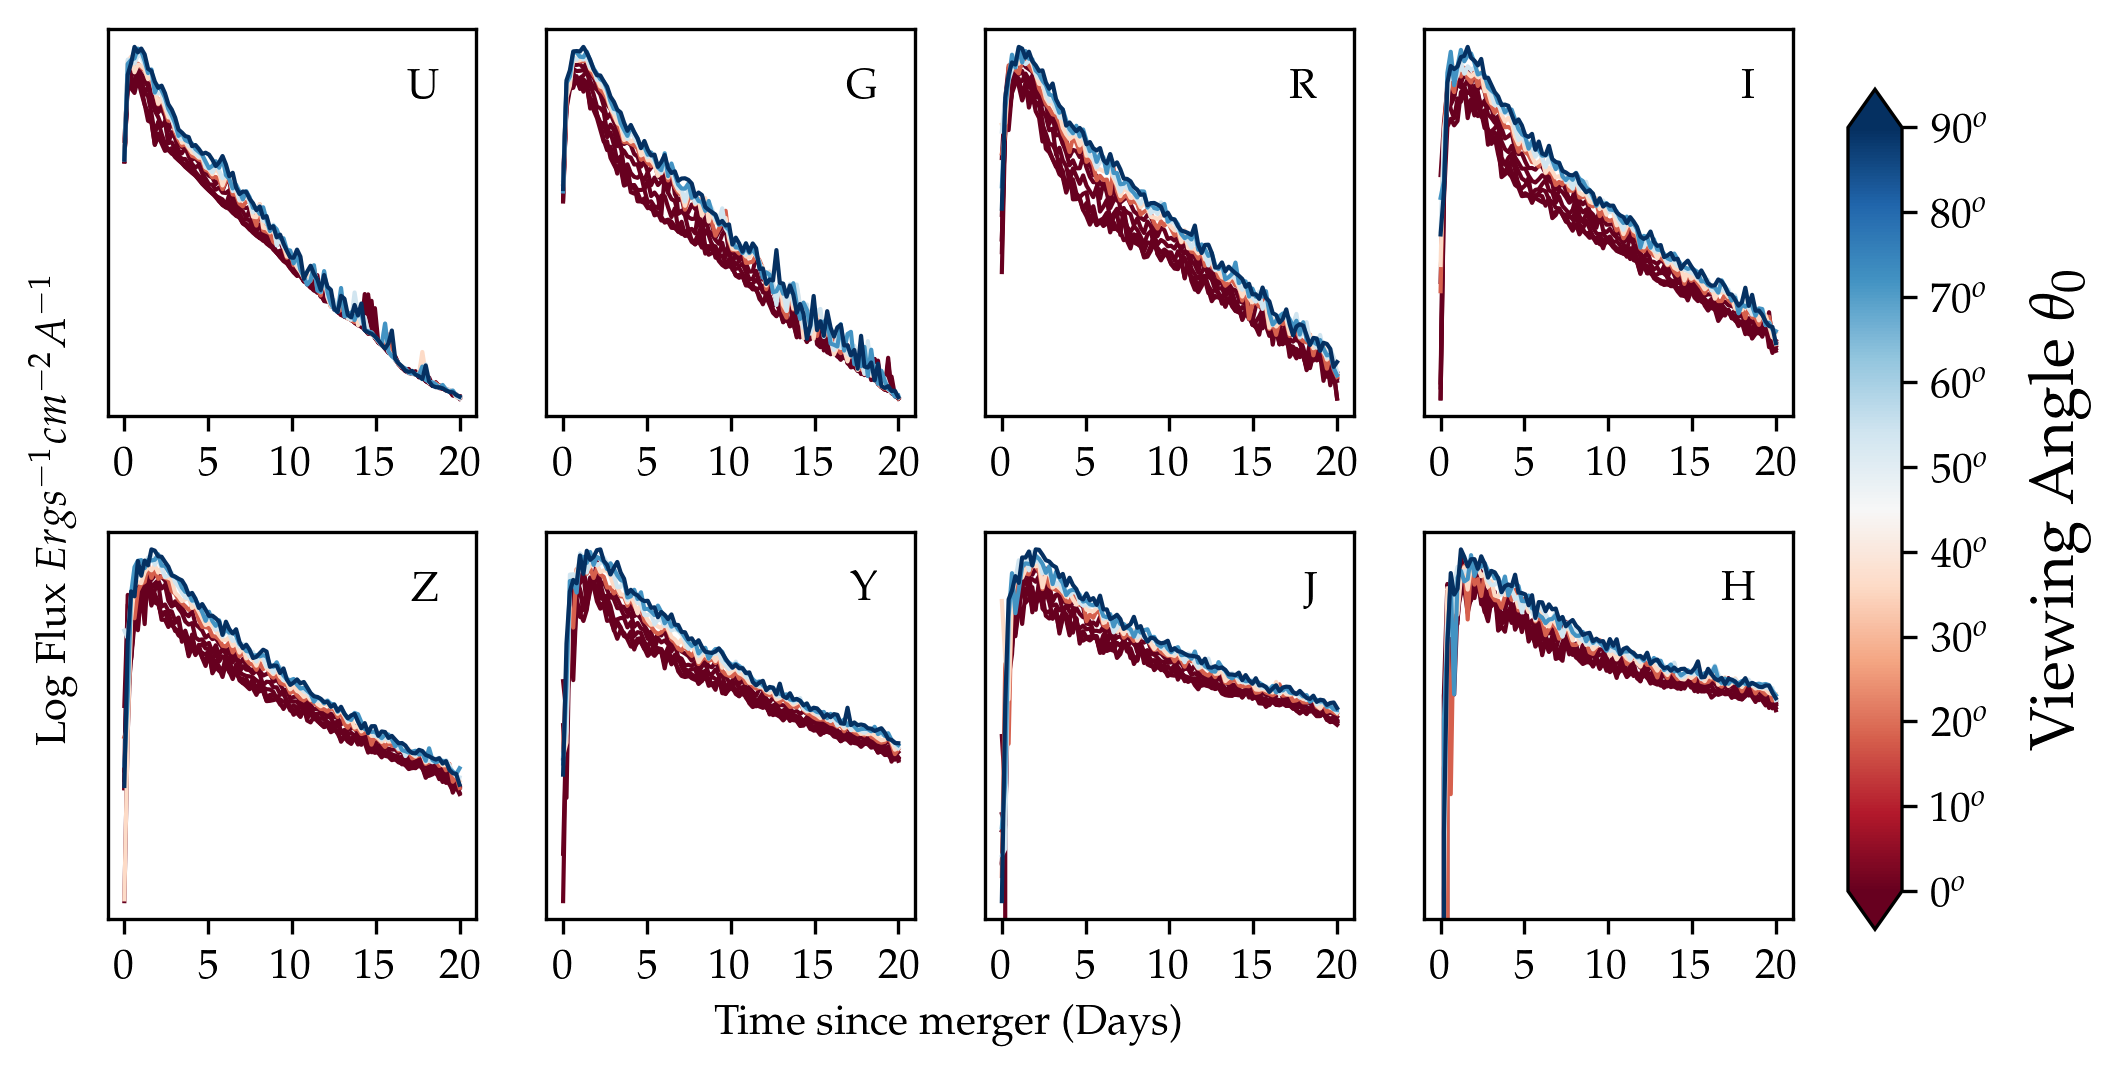

In [4]:
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data = LightCurve("reference.csv")
data.select_viewingangle(phi_range, mejdyn_range, mejwind_range)
data.plot_viewingangle()

In [5]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
phi_range = [45]
mejwind_range = [0.13]
# data.select_mejdyn(wv_range, iobs_range, phi_range, mejwind_range)
# data.mejdyn
# data.plot_mejdyn(verbose = True)

In [6]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
mejdyn_range = [0.01]
phi_range = [45]
# data.select_mejwind(wv_range, iobs_range, phi_range, mejdyn_range)
# data.mejwind
# data.plot_mejwind(verbose = True)

In [7]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
mejdyn_range = [0.01]
mejwind_range = [0.11]
# data.select_phi(wv_range, iobs_range, mejwind_range, mejdyn_range)
# data.plot_phi(verbose = True)

# Gaussian Process Script

In [8]:
gp = GP("reference.csv")
phi_range = [45]
mejdyn_range = [0.01]
mejwind_range = [0.11]
wv = 900
gp.range_select_wavelength(phi_range, mejdyn_range, mejwind_range, wv)
# gp.viewingangle

In [9]:
gp.single_time_step(1) # Want distribution at 1 day
gp.time_sliced
# gp.time_sliced_normed
# arr = gp.time_sliced.to_numpy()[0]
# plt.scatter(np.linspace(0,gp.Nobs,len(arr)), arr)

iobs             0         1         2         3         4         5   \
time_step                                                               
5          0.002709  0.002237  0.003472  0.003301  0.004151  0.005073   

iobs             6         7         8         9         10  
time_step                                                    
5          0.004041  0.005399  0.005223  0.005627  0.007347

In [10]:
gp.normedDF()

In [11]:
gp.setXY_viewingangle()
gp.set_kernel(GPy.kern.RBF(input_dim=1, variance = 2, lengthscale=2))
gp.set_model(GPy.models.GPRegression(gp.X, gp.Y, gp.kernel))

In [12]:
gp.set_predX(np.linspace(0,gp.Nobs,100).reshape(100, 1))

# # Manual
# gp.plot_prior(manual = True, sig = 2)
# gp.plot_covariance()
# cov1 = gp.cov

# # Automatic
# gp.plot_prior(manual = False, title = "Untrained Posterior")
# gp.plot_covariance()
# cov2 = gp.cov

# # Comparison
# print(f"Are covariance matricies equal? {np.allclose(cov1, cov2)}")
# plt.show()


Name : GP regression
Objective : -1.3297537698986739
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |    0.5048741357115837  |      +ve      |        
  rbf.lengthscale          |    10.237731281822857  |      +ve      |        
  Gaussian_noise.variance  |  0.019581516431695353  |      +ve      |        


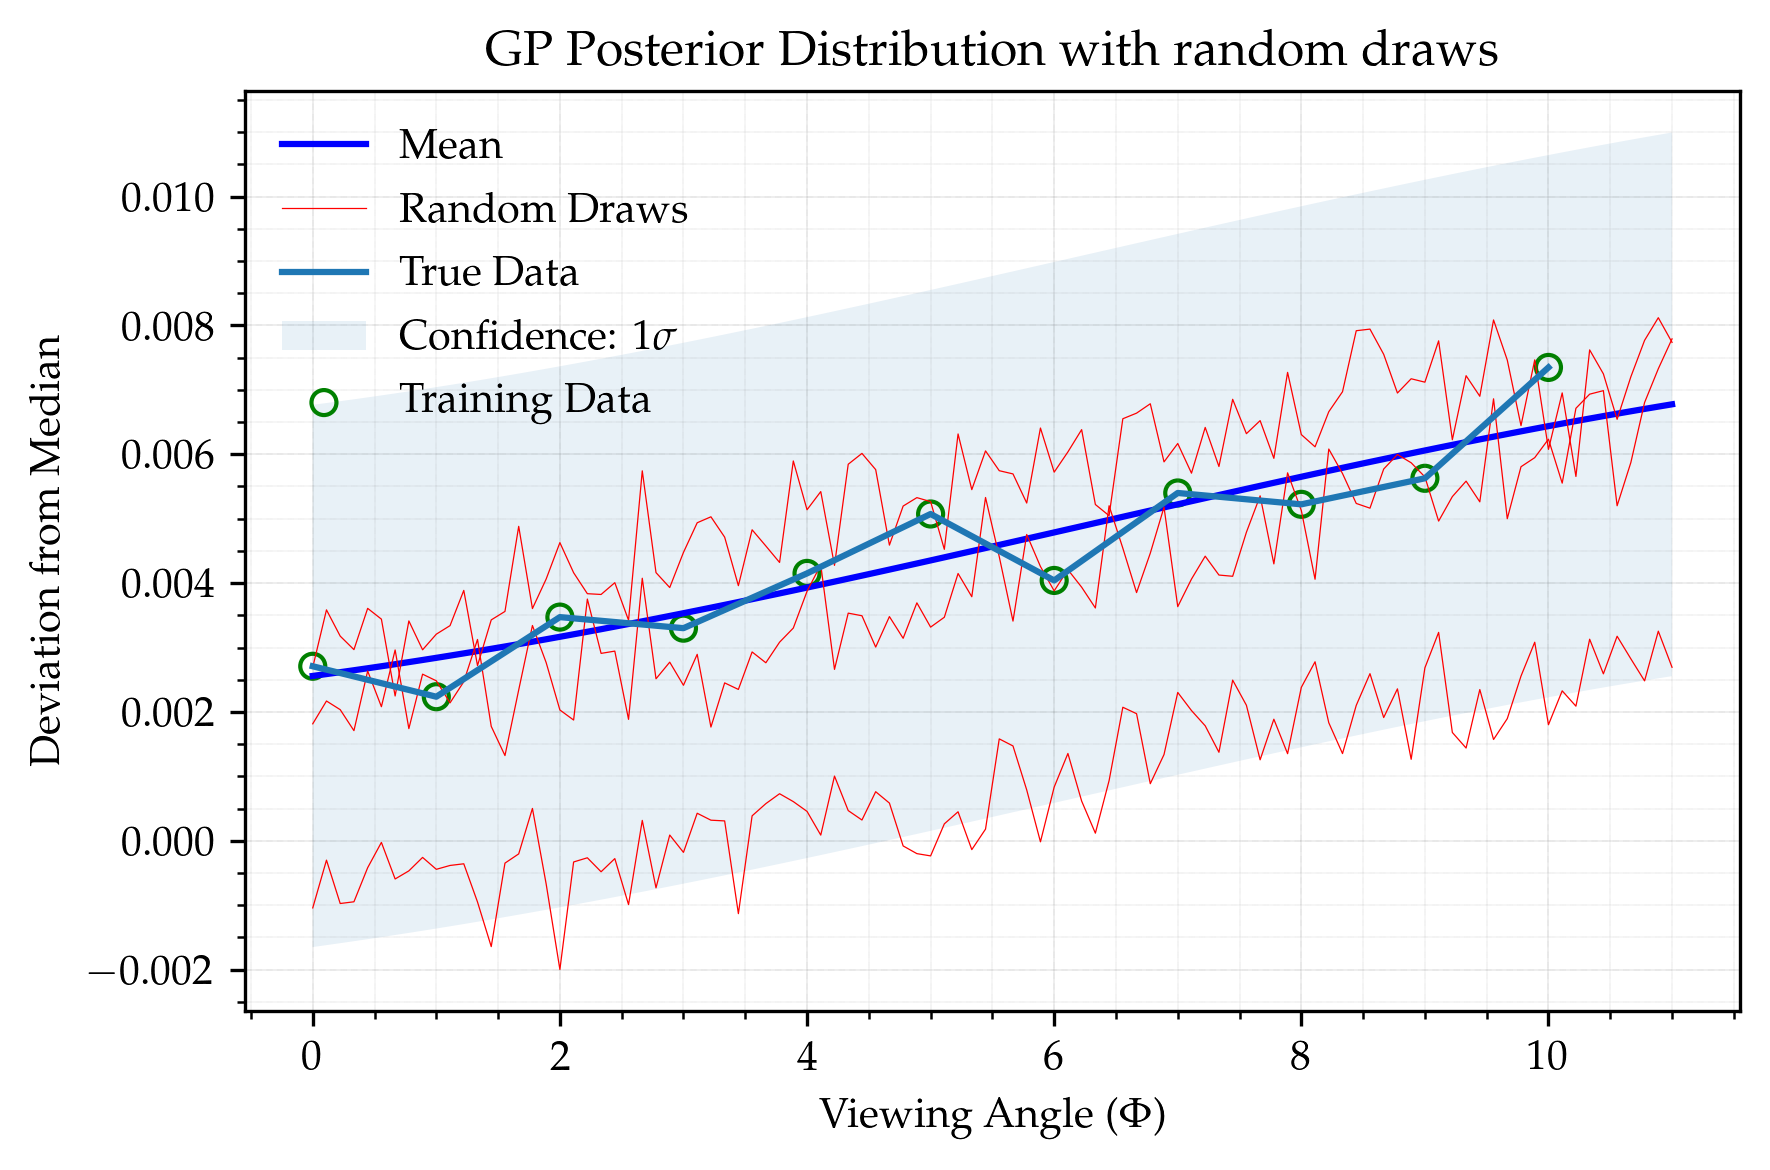

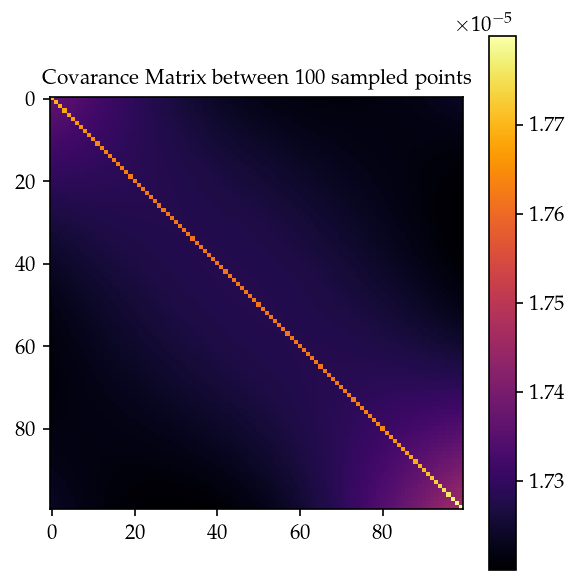

In [13]:
gp.model_train(verbose = True)

# # Manual
# gp.plot_posterior(manual = True)
# gp.plot_covariance()
# cov1 = gp.cov

# Automatic
gp.plot_posterior(manual = False, include_like = True)
plt.plot(gp.X.T[0], gp.time_sliced.to_numpy()[0], label = "True Data")
plt.legend()
gp.plot_covariance()
cov2 = gp.cov
# Comparison
# print(f"Are covariance matricies equal? {np.allclose(cov1, cov2)}")
# plt.show()

# LOO Cross Validation

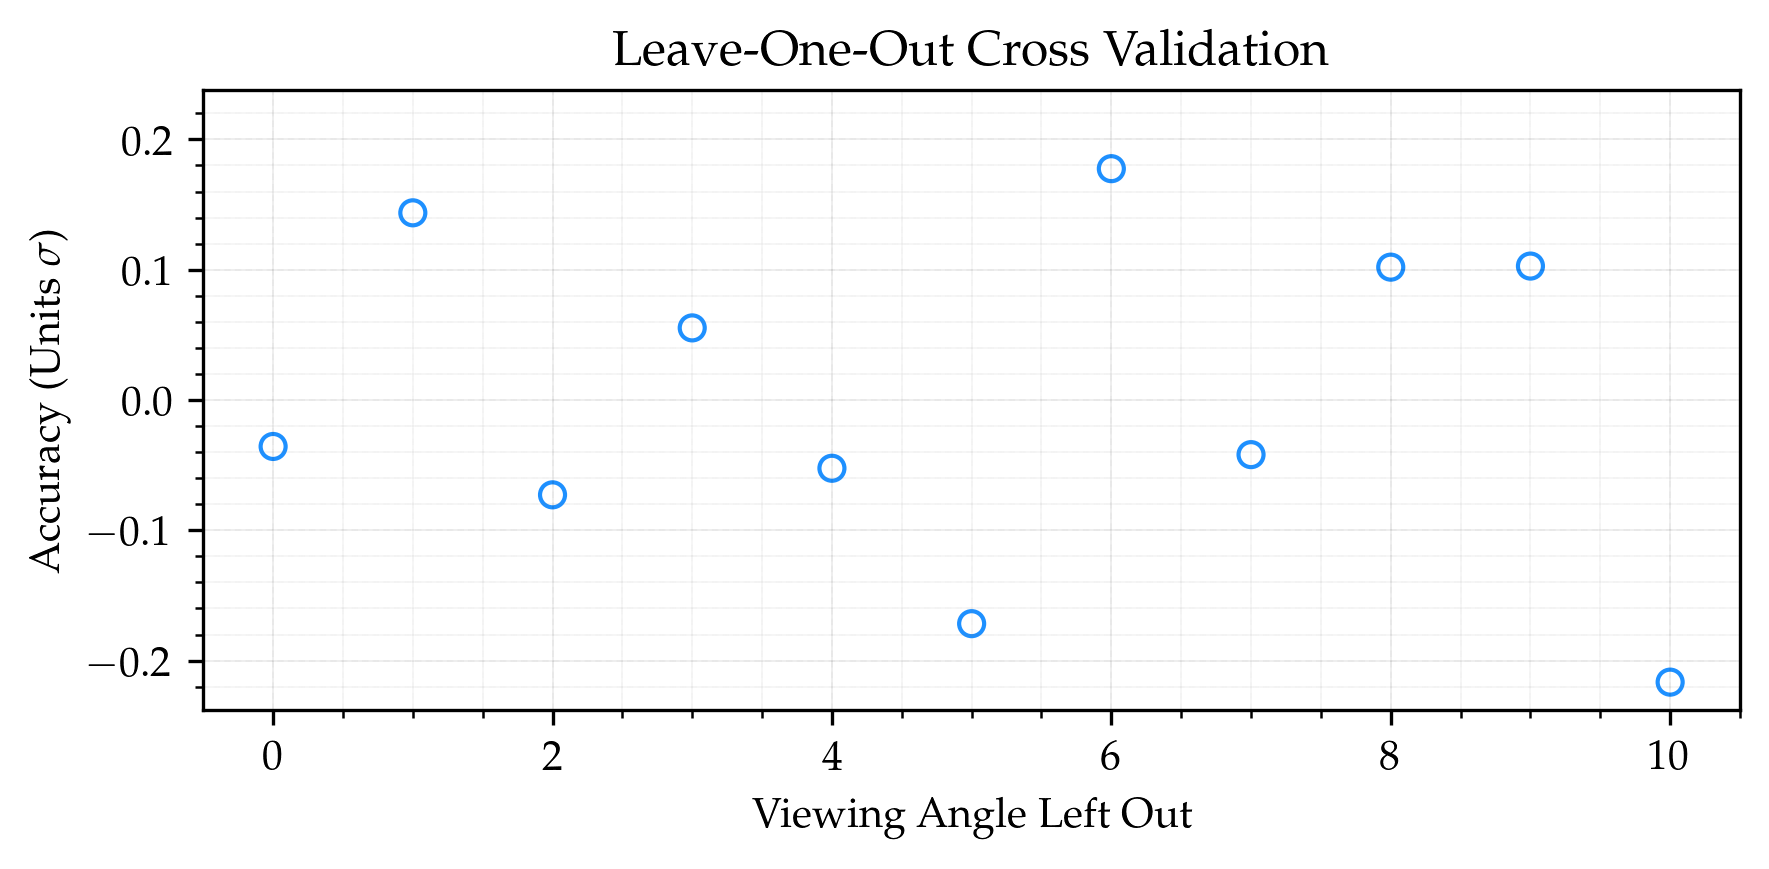

In [14]:
gp.LOOCV()
# gp.plot_loocv_simple()
gp.plot_loocv()
# gp.LOOCV(manual = False)

# Multiple GP LOO-CV

In [15]:
# gp = GP("reference.csv")
# gp.multiple_LOOCV(N = 3, verbose = True)
# gp.loo_list_multiple.shape

In [16]:
# gp.plot_loocv(plot_type = "multiple")

# Multi-Dimensional Gaussian Process

In [17]:
gp = GP2D("reference.csv")
phi_range = [30]
mejwind_range = [0.05]
mejdyn_range = [0.01]
wv_range = [900]
gp.set_selection_range(typ = "phi", phi_range = phi_range, 
                       mejwind_range = mejwind_range, mejdyn_range = mejdyn_range,
                      wv_range = wv_range, verbose = True)
gp.normalize_training2D()
display(gp.training2D)
gp.setXY()
gp.set_kernel(GPy.kern.RBF(input_dim=2, variance = 1, lengthscale=10))
gp.set_model(GPy.models.GPRegression(gp.X,gp.Y,gp.kernel))
gp.model_train(verbose = True)
gp.model_predict(N = 50)
gp.unnormalize_training2D()

 29%|██▊       | 2/7 [00:00<00:02,  2.01it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.050_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 86%|████████▌ | 6/7 [00:02<00:00,  2.24it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.050_phi90.txt 
does not have the correct number of viewing angles. Skipping...


100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


iobs        0         1         2         3         4         5         6   \
phi                                                                          
15    0.001524  0.001862  0.001857  0.002555  0.002302  0.002161  0.003702   
75    0.003524  0.003628  0.004065  0.003421  0.003142  0.003615  0.003934   
60    0.003953  0.003135  0.003092  0.003419   0.00367  0.003326  0.004541   
45     0.00371  0.003648  0.003052  0.003065  0.003118  0.003309  0.003955   
90    0.002383  0.002709  0.003068  0.002664  0.003225  0.002992  0.003649   

iobs        7         8         9         10  
phi                                           
15    0.004016  0.005236  0.004549  0.005145  
75    0.003111   0.00299  0.003961  0.003712  
60    0.003971  0.004517  0.005162  0.004486  
45    0.004744  0.005699  0.005692  0.006823  
90    0.005475  0.005925  0.005246  0.006445


Name : GP regression
Objective : -15.826976846483042
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |   0.13186986767792372  |      +ve      |        
  rbf.lengthscale          |     4.209203881049971  |      +ve      |        
  Gaussian_noise.variance  |  0.012711998494020212  |      +ve      |        


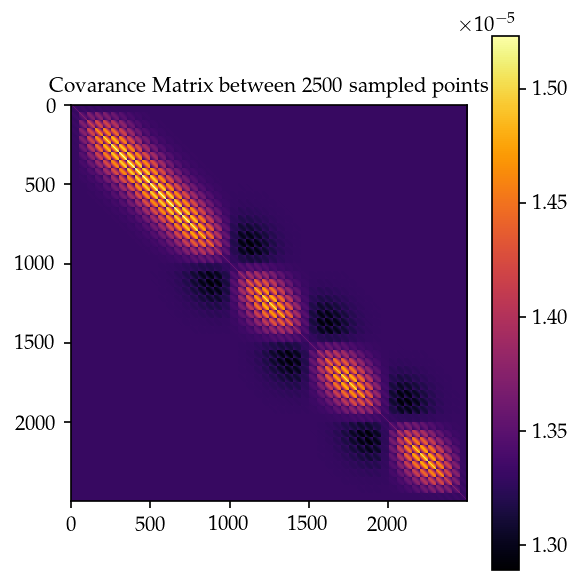

In [18]:
gp.plot_covariance2D()

 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


[STATUS] Plotting for: 
[STATUS] mejdyn: [0.01] 
[STATUS] mejwind: [0.05] 
[STATUS] phi: [15 75 60 45 90] 
[STATUS] viewing_angle: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] 
[STATUS] wavelength: 900


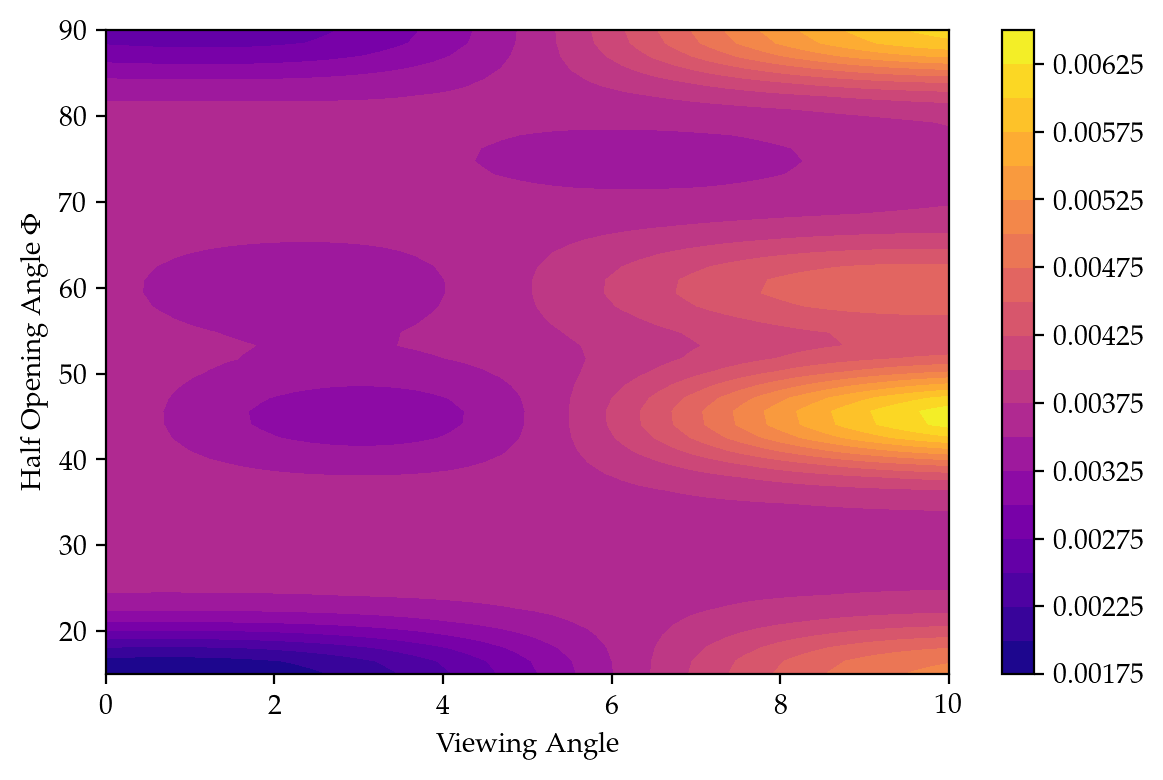

In [19]:
gp.model.plot() # GPy Plotting
gp.plot_posterior2D(verbose = True) # My Plotting